http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
https://osf.io/w7tds/  unravelling

http://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb

Randomforest
https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests



In [235]:
import pandas as pd                                     # for dealing with csv import
import numpy as np                                      # arrays and other matlab like manipulation
import os                                               # for joining paths and filenames sensibly
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn import metrics
from random import shuffle

In [196]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv')
allRefs = df.refNum.value_counts()
len(allRefs[allRefs > 21])
#df = df.iloc[:, :-9]
len(df.playerShort.unique())

2053

In [77]:
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [78]:
len(df.index)

146028

In [79]:
# Display the first 10 rows of the dataset. Only 13 columns for space reasons
df.ix[:10,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,1,0,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,0,0,0


In [80]:
df.columns.values

array(['playerShort', 'player', 'club', 'leagueCountry', 'birthday',
       'height', 'weight', 'position', 'games', 'victories', 'ties',
       'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards',
       'photoID', 'rater1', 'rater2', 'refNum', 'refCountry', 'Alpha_3',
       'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp'], dtype=object)

In [81]:
df.dtypes

playerShort       object
player            object
club              object
leagueCountry     object
birthday          object
height           float64
weight           float64
position          object
games              int64
victories          int64
ties               int64
defeats            int64
goals              int64
yellowCards        int64
yellowReds         int64
redCards           int64
photoID           object
rater1           float64
rater2           float64
refNum             int64
refCountry         int64
Alpha_3           object
meanIAT          float64
nIAT             float64
seIAT            float64
meanExp          float64
nExp             float64
seExp            float64
dtype: object

# Mean skin tone

We see that there aren't any players with only one skin colour rating, thus it should be alright to find the means of those who have two rating and use those for RandomForest classification.

In [82]:
dfnew = pd.DataFrame(df, columns=['player', 'rater1', 'rater2'])
dfnew.ix[200:300,:]

,player,rater1,rater2
200,Sébastien Grax,0.00,0.25
201,Sébastien Roudet,0.00,0.25
202,Sigamary Diarra,NaN,NaN
203,Sloan Privat,NaN,NaN
204,Steeve Elana,0.75,0.75
205,Stéphane Darbion,NaN,NaN
206,Stéphen Drouin,NaN,NaN
207,Steven N'Zonzi,NaN,NaN
208,Sylvio Rodelin,0.50,0.50
209,Thiago Xavier,NaN,NaN


Generate new column which is the mean of two rater's opinions about the skin colour.

In [83]:
df['skinTone'] = ((df['rater1']+df['rater2'])/2).dropna()

In [84]:
dfnew = pd.DataFrame(df, columns=['player', 'rater1', 'rater2', 'skinTone'])
dfnew.head(10)

,player,rater1,rater2,skinTone
0,Lucas Wilchez,0.25,0.50,0.375
1,John Utaka,0.75,0.75,0.750
2,Abdón Prats,NaN,NaN,NaN
3,Pablo Marí,NaN,NaN,NaN
4,Rubén Peña,NaN,NaN,NaN
5,Aaron Hughes,0.25,0.00,0.125
6,Aleksandar Kolarov,0.00,0.25,0.125
7,Alexander Tettey,1.00,1.00,1.000
8,Anders Lindegaard,0.25,0.25,0.250
9,Andreas Beck,0.00,0.00,0.000


In [85]:
df = df[pd.notnull(df['skinTone'])]
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skinTone
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000


The number of dropped rows is not too large only around 15% of the initial dataset.

In [86]:
len(df.index)

124621

In [87]:
dif = 146028-124621
percent = dif/146028 * 100
percent

14.659517352836444

skinTone = skin rating of photo by rater (5-point scale ranging from “very light skin” to “very dark skin”)
So, we could categorize the skinTone feature, so that over 2.5 it is dark and under it is white.

In [88]:
df['skinTone'].describe()

count    124621.000000
mean          0.283559
std           0.288517
min           0.000000
25%           0.000000
50%           0.250000
75%           0.375000
max           1.000000
Name: skinTone, dtype: float64

As we see, the values are between 0 and 1, median being at 0.25, so there are more whites than people with dark skin. 
Alexander Tettey has a score of 1, and when we Google his name we see that he does have a very dark skin.

# Random Forests

In [89]:
from sklearn.ensemble import RandomForestClassifier

Good example : https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests

In [90]:
def map_objects(column):
    le = preprocessing.LabelEncoder()
    le.fit(column)
    return le.transform(column)

In [191]:
len(df.dropna())

115457

In [92]:
df.dropna(inplace=True)

tosum = ['playerShort', 'games', 'victories', 'ties', 'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards']
tocollect = ['playerShort', 'height', 'weight', 'skinTone', 'club', 'leagueCountry', 'position'] #Justify for the 3 last columns
tomean = ['playerShort', 'meanIAT', 'meanExp',]
tomeanstd = ['playerShort', 'seIAT', 'seExp']

group1 = df[tosum].groupby('playerShort').sum()
group2 = df[tocollect].groupby('playerShort').first()
group3 = df[tomean].groupby('playerShort').mean()
group4 = df[tomeanstd].groupby('playerShort').agg(lambda x: np.sqrt(np.mean(x**2)/len(x)))

df = pd.concat([group1, group2, group3, group4], axis=1)

df.head(5)

,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,height,weight,skinTone,club,leagueCountry,position,meanIAT,meanExp,seIAT,seExp
playerShort,,,,,,,,,,,,,,,,,,
aaron-hughes,654,247,179,228,9,19,0,0,182.0,71.0,0.125,Fulham FC,England,Center Back,0.346459,0.494575,0.000257,0.002137
aaron-hunt,336,141,73,122,62,42,0,1,183.0,73.0,0.125,Werder Bremen,Germany,Attacking Midfielder,0.348818,0.449220,0.000055,0.000252
aaron-lennon,412,200,97,115,31,11,0,0,165.0,63.0,0.250,Tottenham Hotspur,England,Right Midfielder,0.345893,0.491482,0.000126,0.000887
aaron-ramsey,260,150,42,68,39,31,0,1,178.0,76.0,0.000,Arsenal FC,England,Center Midfielder,0.346821,0.514693,0.002757,0.010251
abdelhamid-el-kaoutari,124,41,40,43,1,8,4,2,180.0,73.0,0.250,Montpellier HSC,France,Center Back,0.331600,0.335587,0.001037,0.003851


In [19]:
def get_sets(data, split):
    data.reindex(np.random.permutation(data.index))
    
    X_train = data[:int(len(data)*split)].select_dtypes(include=['float64', 'int64'])
    X_test = data[int(len(data)*split)+1:].select_dtypes(include=['float64', 'int64'])
    
    X_train = pd.concat([X_train, data[:int(len(data)*split)].select_dtypes(include=['object']).apply(lambda x: map_objects(x))], axis=1)
    X_test = pd.concat([X_test, data[int(len(data)*split)+1:].select_dtypes(include=['object']).apply(lambda x: map_objects(x))], axis=1)
    
    y_train = pd.cut(X_train.skinTone, [-0.1, 0.25, 0.50, 0.75, 1], labels=[1, 2, 3, 4])
    y_test = pd.cut(X_test.skinTone, [-0.1, 0.25, 0.50, 0.75, 1], labels=[1, 2, 3, 4])

    X_train.drop(['skinTone'], axis=1, inplace=True)
    X_test.drop(['skinTone'], axis=1, inplace=True)
    
    return (X_train, X_test, y_train, y_test)

def get_rfe(data):
    classifier = RandomForestClassifier()
    
    X_train, X_test, y_train, y_test = get_sets(data, 0.8)
    
    selector = RFE(classifier, step=1)
    selector.fit(X_train, y_train)
    
    return selector
    
def train_and_predict(data, use=1):
    classifier = RandomForestClassifier()
    data.reindex(np.random.permutation(data.index))
    
    X_train, X_test, y_train, y_test = get_sets(data, 0.8)

    classifier.fit(X_train[:int(len(X_train)*use)], y_train[:int(len(X_train)*use)])

    precision = classifier.predict(X_test) == y_test
    precision = precision.value_counts()

    return precision[True]/sum(precision)

Xy = df
print(train_and_predict(Xy))
selector = get_rfe(Xy)

0.718861209964


In [20]:
f = pd.DataFrame()
f['column'] = Xy.columns.drop('skinTone')
f['importance'] = selector.ranking_
f['support'] = selector.support_
f.sort_values(by='importance', ascending=True)

,column,importance,support
0,games,1,True
1,victories,1,True
3,defeats,1,True
4,goals,1,True
5,yellowCards,1,True
10,club,1,True
2,ties,2,False
9,weight,3,False
8,height,4,False
12,position,5,False


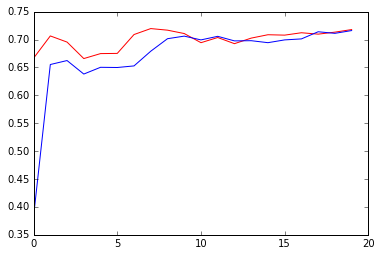

In [21]:
features1 = f[f.importance == 1].column.append(pd.Series('skinTone'))
features2 = f[f.importance != 1].column.append(pd.Series('skinTone'))

folds = 20
cv = 10

Xy = df[features1]
Xy2 = df[features2]

average = []
average2 = []
for i in range(folds):
    results = []
    results2 = []
    for j in range(cv):
        results.append(train_and_predict(Xy, (i+1)/folds))
        results2.append(train_and_predict(Xy2, (i+1)/folds))
    
    average.append(sum(results)/len(results))
    average2.append(sum(results2)/len(results2))
    
plt.plot(average, 'r-', average2, 'b-')

In [22]:
Xy.columns.values

array(['games', 'victories', 'defeats', 'goals', 'yellowCards', 'club',
       'skinTone'], dtype=object)

In [96]:
df2.columns

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')

In [ ]:
# Compute the Balanced Error Rate
def ber(truth, predicted, classes):
    errors = 0
    lengths = [len(truth[truth == c]) for c in classes]
    n = len(truth)
    
    for c in classes:
        for i in range(n):
            if predicted[i] != truth[i] and c == truth[i]:
                errors += 1/lengths[c]
            
    return errors/len(classes)
                
# Compute Balanced Error Rate for [0, 1] classes
def compute_misclassification(skinTone, skinTone_p):
    return ber(round(skinTone), skinTone_p, [0, 1])

# Read the data, drop the NAs and keep only the features of interest
df2 = pd.read_csv('CrowdstormingDataJuly1st.csv')
df2.dropna(inplace=True)

# Aggregate referees variables after grouping by players
tosum = ['playerShort', 'yellowCards', 'yellowReds', 'redCards', 'games', 'ties', 'goals']
tocollect = ['playerShort', 'refCountry', 'rater1', 'rater2']
tomean = ['playerShort', 'meanIAT', 'meanExp']
tomeanstd = ['playerShort', 'seIAT', 'seExp']

group1 = df2[tosum].groupby('playerShort').sum()
group2 = df2[tocollect].groupby('playerShort').first()
group3 = df2[tomean].groupby('playerShort').mean()
group4 = df2[tomeanstd].groupby('playerShort').agg(lambda x: np.sqrt(np.mean(x**2)/len(x)))

df2 = pd.concat([group1, group2, group3, group4], axis=1)

# Compute the binary skinTone
skinTone = (df2['rater1']+df2['rater2'])/2
skinTone[skinTone >= 0.5] = 1

df2.drop(['rater1', 'rater2'], axis=1, inplace=True)

df2 = df2.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x - max(x))/(max(x) - min(x)) + max(x))
df3 = df2.copy()

# Run KMeans and remove one feature until no feature remains
bestBER = 1
features = []
centers = []
silhouette = 1
for n in range(1000):
    df2 = df3.copy()
    
    # Shuffle the DataFrame
    cols = df2.columns.values.tolist()
    shuffle(cols)
    df2 = df2[cols]
    
    while (len(df2.columns) > 0):
        fit = KMeans(2).fit(df2)
        lab = [True if v == 1 else False for v in fit.labels_]

        total = 0
        for i in range(len(skinTone)):
            total += abs(skinTone[i] - fit.labels_[i])

        err = compute_misclassification(skinTone, fit.labels_)
        #print("Misclassification: " + str(compute_misclassification(skinTone, fit.labels_)))
        #print("Count: " + str(total))
        #print(metrics.silhouette_score(df2, fit.labels_))
        
        if err < bestBER:
            bestBER = err
            features = df2.columns.values
            centers = fit.cluster_centers_
            silhouette = metrics.silhouette_score(df2, fit.labels_)
            
            print("\nBER: " + str(err))
            print("Features: " + str(features))
            print("Silhouette: " + str(silhouette))
            print("Centers: " + str(centers))

        toRemove = df2.columns[len(df2.columns)-1]
        df2.drop(toRemove, axis=1, inplace=True)

# To put results in perspective
print("Samples with skinTone >= 0.5: " + str(len(skinTone[skinTone >= 0.5])))
print("Balanced Error Rate when prediciting full white: " + str(compute_misclassification(skinTone, np.zeros(len(skinTone)))))


BER: 0.4896235078053285
Features: ['seIAT' 'meanIAT' 'seExp' 'games' 'redCards' 'refCountry' 'yellowReds'
 'ties' 'meanExp' 'goals' 'yellowCards']
Centers: [[ -9.59706106e-01   2.00179169e-02  -9.33860537e-01   9.13425578e+02
    1.21375907e+01   1.10101561e+02   1.11327044e+01   1.96471641e+02
    5.39860543e-01   4.19120072e+02   1.96269668e+02]
 [ -9.58670560e-01   2.47201728e-02  -9.34561998e-01   9.13176081e+02
    1.20458597e+01   1.10154085e+02   1.10538995e+01   1.96194230e+02
    5.32707964e-01   4.19039844e+02   1.96105959e+02]]
Silhouette: 0.277584673505

BER: 0.47318640955004804
Features: ['seIAT']
Centers: [[-0.97131941]
 [-0.69067616]]
Silhouette: 0.881078476765

BER: 0.4095959595959613
Features: ['seExp']
Centers: [[-0.94947629]
 [-0.76541509]]
Silhouette: 0.834251829451


In [287]:
round(0.5)

0

In [288]:
np.round(0.5)

0.0